In [3]:
import pandas as pd

df1=pd.read_csv('indeed_job_results.csv',sep=',')
df2=pd.read_csv('linkedin_job_results.csv',sep=',')


df2


,Job Title,Company,Location,Job Link,Description
0,Mechanical Maintenance Technician - Hiring Bon...,Charter,·,https://www.linkedin.com/jobs/view/mechanical-...,About the job This job is sourced from a job b...
1,Workshop Technician - Mechanical,AeroTrain,·,https://www.linkedin.com/jobs/view/workshop-te...,About the job This job is sourced from a job b...
2,Mechanical Engineering Technician,USDA,Edinburg,https://www.linkedin.com/jobs/view/mechanical-...,About the job Help Help Requirements Condition...
3,Preventive Maintenance Technician,Holt,California,https://www.linkedin.com/jobs/view/preventive-...,About the job Holt of California is proud to b...
4,Mechanical Test Technician,Rationalz,Fort,https://www.linkedin.com/jobs/view/mechanical-...,About the job Fort Collins Colorado (Onsite) -...
...,...,...,...,...,...
709,Mechanical Technician,Flux,Ltd.,https://www.linkedin.com/jobs/view/mechanical-...,About the job Company OverviewFlux Marine is a...
710,Electro-Mechanical Assembly Technician,Codonics,Middleburg,https://www.linkedin.com/jobs/view/electro-mec...,About the job This job is sourced from a job b...
711,Electro-Mechanical Technician (EMT),Pro-Tech,Services,https://www.linkedin.com/jobs/view/electro-mec...,About the job This job is sourced from a job b...
712,Hydro-Blaster,EMCOR,Inc.,https://www.linkedin.com/jobs/view/hydro-blast...,About the job Detailed:About Us:Ohmstede Ltd. ...


In [4]:

# Dictionary to map old column names to new column names
new_column_names = {
                    'Description': 'description'}

# Rename columns using the rename() function
df2.rename(columns=new_column_names, inplace=True)
df2.columns = df2.columns.str.replace('\t', '')




In [5]:
df3 = pd.concat([df1, df2])
df3


,Job Title,Company,Location,Job Link,description
0,Regional Truck Driver,North American Bulk Transport,2132 SE 18th St Oklahoma City OK 73129,https://www.indeed.com/company/Tankstar/jobs/T...,McCorkle Truck Line Inc. hauls dry bulk mater...
1,Driver,LTI Inc.,10220 W Westbow Rd Spokane WA 99224,https://www.indeed.com/rc/clk?jk=16190ccb44ba6...,------ $30.50 /HOUR BASE RATE ------ LTI Inc....
2,Delivery Driver - Cargo Van,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...
3,Cargo Van Delivery Driver,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...
4,Box Truck Delivery Driver,Need It Now Delivers - Automotive,Fort Washington PA,https://www.indeed.com/company/Need-It-Now-Del...,$3325 Weekly - Delivery Driver – No Experience...
...,...,...,...,...,...
709,Mechanical Technician,Flux,Ltd.,https://www.linkedin.com/jobs/view/mechanical-...,About the job Company OverviewFlux Marine is a...
710,Electro-Mechanical Assembly Technician,Codonics,Middleburg,https://www.linkedin.com/jobs/view/electro-mec...,About the job This job is sourced from a job b...
711,Electro-Mechanical Technician (EMT),Pro-Tech,Services,https://www.linkedin.com/jobs/view/electro-mec...,About the job This job is sourced from a job b...
712,Hydro-Blaster,EMCOR,Inc.,https://www.linkedin.com/jobs/view/hydro-blast...,About the job Detailed:About Us:Ohmstede Ltd. ...


In [6]:
data=df3.copy()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6928 entries, 0 to 713
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    6928 non-null   object
 1   Company      6743 non-null   object
 2   Location     6928 non-null   object
 3   Job Link     6928 non-null   object
 4   description  6928 non-null   object
dtypes: object(5)
memory usage: 324.8+ KB


In [9]:
data.isnull().sum()

Job Title        0
Company        185
Location         0
Job Link         0
description      0
dtype: int64

In [10]:
data['Job Title'].unique()

array(['Regional Truck Driver', 'Driver', 'Delivery Driver - Cargo Van',
       'Cargo Van Delivery Driver', 'Box Truck Delivery Driver',
       'Fuel Transport Driver', 'ROUTE DRIVER - VENDING (FULL-TIME)',
       'Delivery Driver', 'Shuttle Route Delivery Driver', 'Driver (MKS)',
       'MOTOR TRUCK DRIVER (M)', 'Truck Driver - Teams',
       'High Top Cargo Van Delivery Driver', 'Job Title',
       'MECANICIEN POIDS LOURDS – DÉBUTANT ACCEPTÉ - H/F',
       'Apprenti mécanicien Poids Lourds',
       'MECANICIEN POIDS LOURDS NORME EURO 6 F/H',
       'Mécanicien poids lourds (H/F)', 'MECANICIEN POIDS LOURDS H/F',
       'MECANICIEN TP H/F', 'Apprenti Mécanicien H/F', 'MECANICIEN',
       'Mécanicien Poids Lourds H/F', 'MECANICIEN POIDS LOURD / BUS',
       'APPRENTI(E) MECANICIEN(NE) H/F', 'Mecanicien Poids Lourds H/F',
       'MECANICIEN H/F', 'Mécanicien industriel',
       'Mécanicien.ne monteur INTERIM',
       'Mechanical Maintenance Technician - Hiring Bonus $ 2000',
       'Wor

In [11]:
data['Job Title'].nunique()

68

In [12]:
categories = data['Job Title'].value_counts().reset_index()
categories

,Job Title,count
0,Driver,556
1,APPRENTI(E) MECANICIEN(NE) H/F,230
2,Apprenti mécanicien Poids Lourds,230
3,MECANICIEN POIDS LOURDS – DÉBUTANT ACCEPTÉ - H/F,230
4,Mécanicien poids lourds (H/F),229
...,...,...
63,Mechanical Fitter (workshop basedmaintenance r...,15
64,Apartment HVAC Maintenance Technician (Part-Time),15
65,Maintenance Technician - $1000 Sign On Bonus!!!,14
66,Electro/Mechanical Maintenance Technician,14


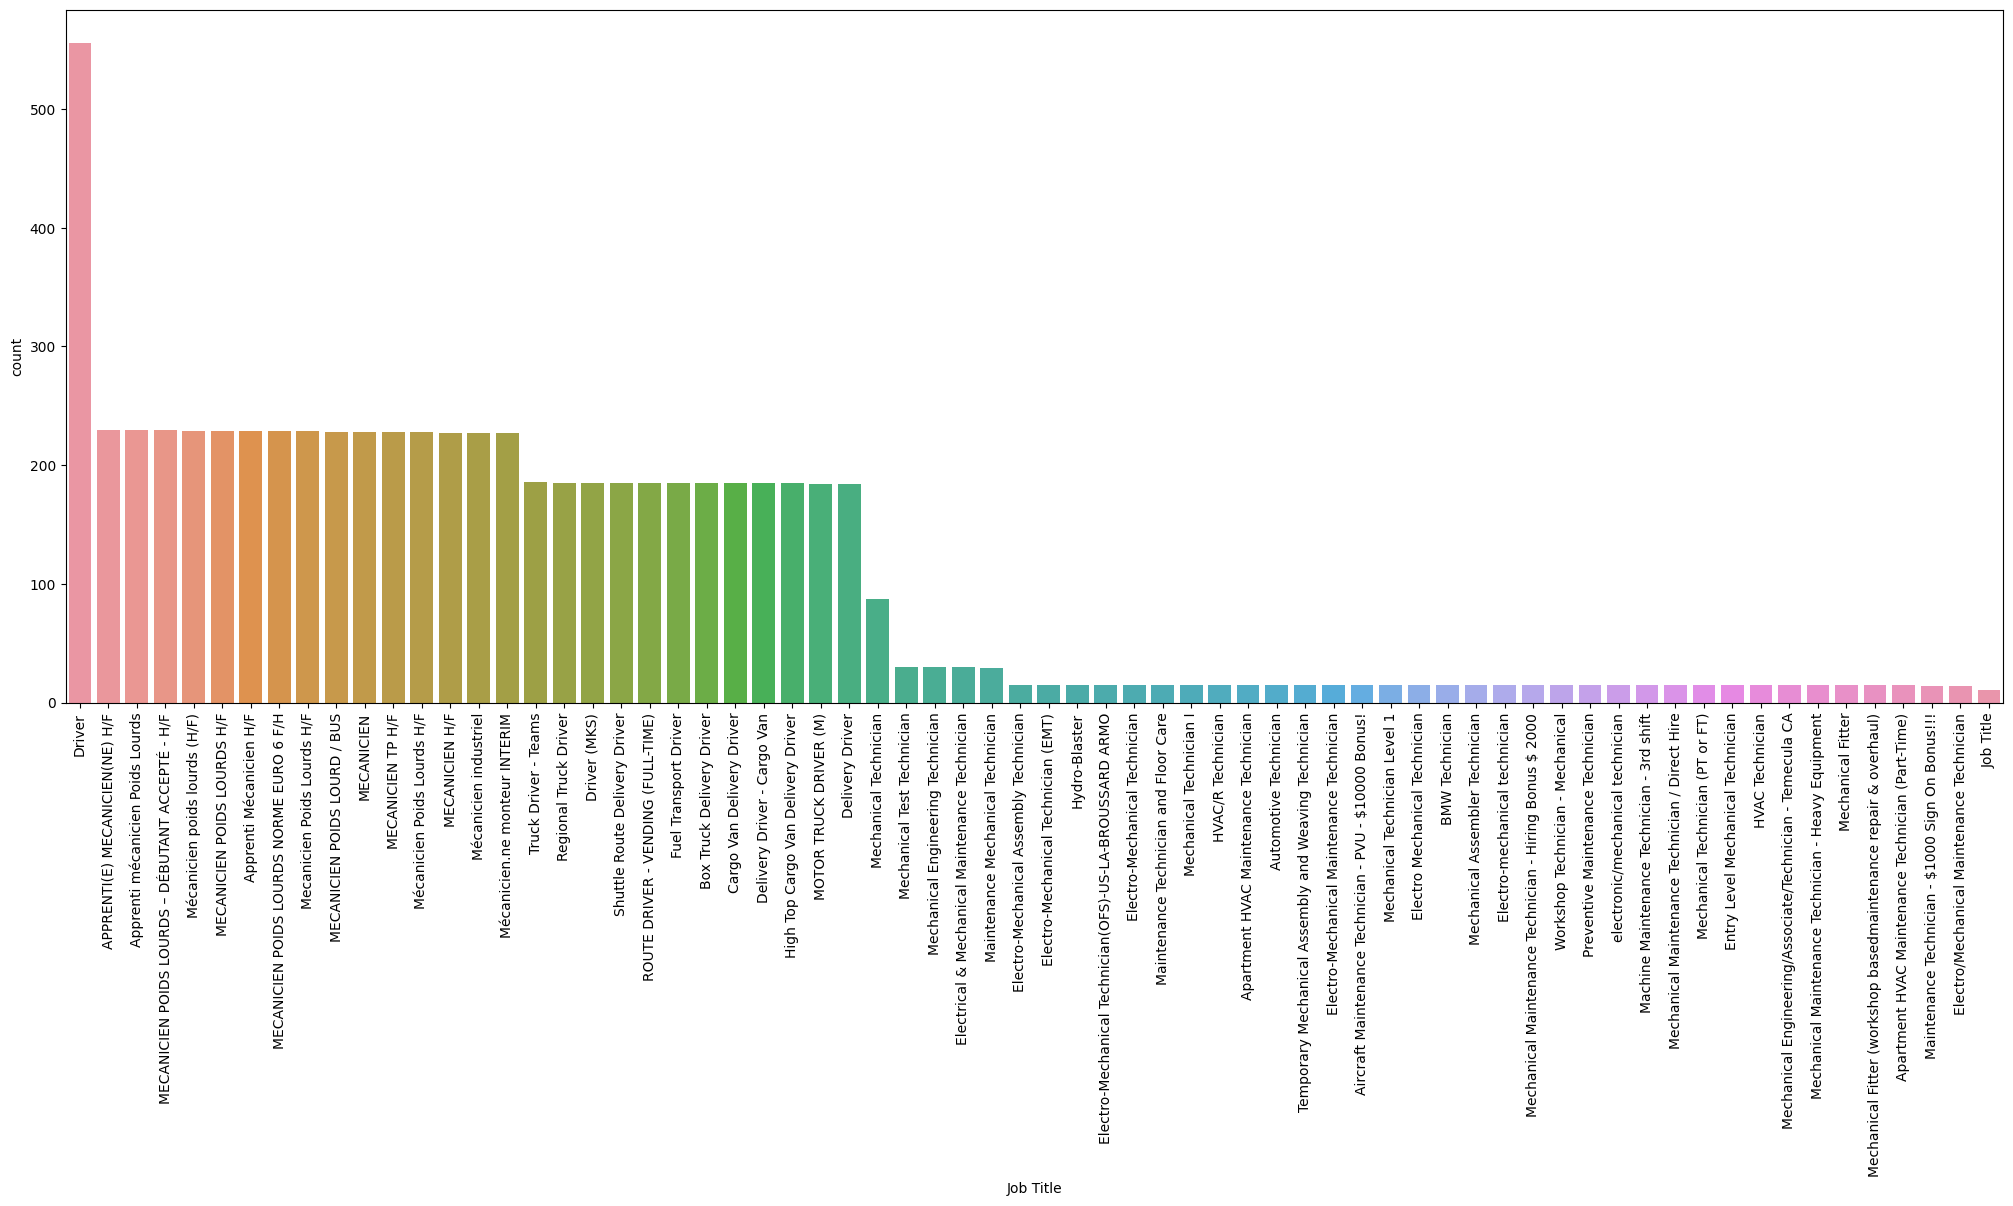

In [13]:
plt.figure(figsize=(25,9))
plt.xticks(rotation=90)
sns.countplot(x ='Job Title', data= data, order= data['Job Title'].value_counts().index)
plt.show()

In [14]:
data1 = data
data1['cleaned_description']= ""

In [15]:
le = LabelEncoder() #convert categorical labels into numerical values
data1['Job Title']= le.fit_transform(data1['Job Title'])
data1

,Job Title,Company,Location,Job Link,description,cleaned_description
0,62,North American Bulk Transport,2132 SE 18th St Oklahoma City OK 73129,https://www.indeed.com/company/Tankstar/jobs/T...,McCorkle Truck Line Inc. hauls dry bulk mater...,
1,12,LTI Inc.,10220 W Westbow Rd Spokane WA 99224,https://www.indeed.com/rc/clk?jk=16190ccb44ba6...,------ $30.50 /HOUR BASE RATE ------ LTI Inc....,
2,11,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...,
3,9,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...,
4,8,Need It Now Delivers - Automotive,Fort Washington PA,https://www.indeed.com/company/Need-It-Now-Del...,$3325 Weekly - Delivery Driver – No Experience...,
...,...,...,...,...,...,...
709,51,Flux,Ltd.,https://www.linkedin.com/jobs/view/mechanical-...,About the job Company OverviewFlux Marine is a...,
710,16,Codonics,Middleburg,https://www.linkedin.com/jobs/view/electro-mec...,About the job This job is sourced from a job b...,
711,19,Pro-Tech,Services,https://www.linkedin.com/jobs/view/electro-mec...,About the job This job is sourced from a job b...,
712,28,EMCOR,Inc.,https://www.linkedin.com/jobs/view/hydro-blast...,About the job Detailed:About Us:Ohmstede Ltd. ...,


process

In [16]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', '', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', '', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [17]:
data1['cleaned_description'] = data1['description'].apply(lambda x: clean_function(x))
data1.head()

,Job Title,Company,Location,Job Link,description,cleaned_description
0,62,North American Bulk Transport,2132 SE 18th St Oklahoma City OK 73129,https://www.indeed.com/company/Tankstar/jobs/T...,McCorkle Truck Line Inc. hauls dry bulk mater...,McCorkle Truck Line Inc hauls dry bulk materia...
1,12,LTI Inc.,10220 W Westbow Rd Spokane WA 99224,https://www.indeed.com/rc/clk?jk=16190ccb44ba6...,------ $30.50 /HOUR BASE RATE ------ LTI Inc....,3050 HOUR BASE RATE LTI Inc is looking for in...
2,11,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...,Express Package System Inc is an Amazon Delive...
3,9,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...,Express Package System Inc is an Amazon Delive...
4,8,Need It Now Delivers - Automotive,Fort Washington PA,https://www.indeed.com/company/Need-It-Now-Del...,$3325 Weekly - Delivery Driver – No Experience...,3325 Weekly Delivery Driver No Experience Nece...


In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iheba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iheba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
english_stopwords = set(stopwords.words('english') + ['``', "''"])
french_stopwords = set(stopwords.words('french'))  # Make sure to download French stopwords using nltk.download('stopwords')
all_stopwords = english_stopwords.union(french_stopwords)

In [21]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


In [22]:


total_words= []
Sentences = data1['description'].values
cleanedSentences= ""
# Sentences
lemmatizer = WordNetLemmatizer()


for i in Sentences:
    cleanedText= clean_function(i)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in all_stopwords and word not in string.punctuation and not(len(word) == 1):
            lemmatized_word = lemmatizer.lemmatize(word.lower())  # Lemmaatize the word
            total_words.append(lemmatized_word)

wordfreqdist = nltk.FreqDist(total_words)
print(wordfreqdist)


<FreqDist with 5109 samples and 1364000 outcomes>


In [23]:
max_words = 100  # Set the maximum number of most common words you want to keep
most_common_words = wordfreqdist.most_common(max_words)

print(most_common_words)

[('driver', 9702), ('experience', 8147), ('work', 8028), ('must', 7813), ('maintenance', 7731), ('job', 6642), ('customer', 6454), ('service', 6094), ('company', 5938), ('time', 5858), ('required', 5580), ('year', 5388), ('day', 5330), ('equipment', 5080), ('pr', 5032), ('paid', 5020), ('canique', 4810), ('poids', 4808), ('hicules', 4802), ('opportunity', 4754), ('insurance', 4664), ('vehicle', 4642), ('quipe', 4572), ('driving', 4526), ('delivery', 4467), ('client', 4449), ('shift', 4448), ('pay', 4424), ('ability', 4422), ('exp', 4112), ('rience', 4112), ('location', 4078), ('hour', 4061), ('position', 3838), ('benefit', 3734), ('able', 3699), ('vous', 3657), ('technique', 3591), ('route', 3571), ('lourds', 3439), ('truck', 3434), ('mission', 3430), ('team', 3322), ('employee', 3306), ('we', 3216), ('int', 3194), ('safety', 3034), ('license', 3024), ('product', 3013), ('state', 2985), ('travail', 2974), ('caniques', 2963), ('type', 2938), ('per', 2910), ('no', 2863), ('program', 2746

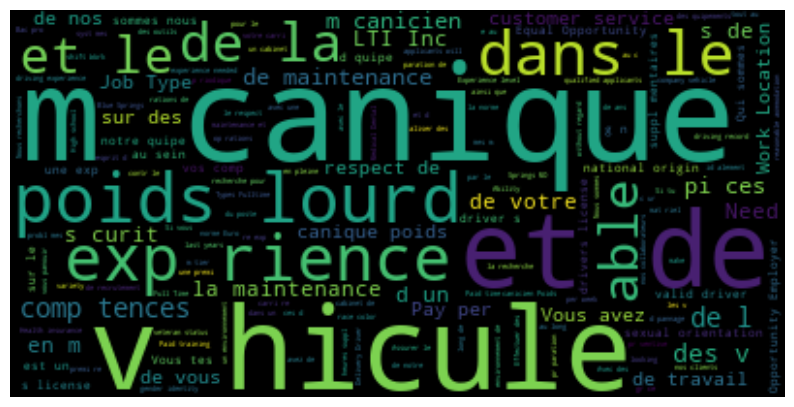

In [24]:
WordCloud= WordCloud().generate(cleanedSentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
Features= data1['cleaned_description'].values
Target= data1['Job Title'].values
data1.head(5)

,Job Title,Company,Location,Job Link,description,cleaned_description
0,62,North American Bulk Transport,2132 SE 18th St Oklahoma City OK 73129,https://www.indeed.com/company/Tankstar/jobs/T...,McCorkle Truck Line Inc. hauls dry bulk mater...,McCorkle Truck Line Inc hauls dry bulk materia...
1,12,LTI Inc.,10220 W Westbow Rd Spokane WA 99224,https://www.indeed.com/rc/clk?jk=16190ccb44ba6...,------ $30.50 /HOUR BASE RATE ------ LTI Inc....,3050 HOUR BASE RATE LTI Inc is looking for in...
2,11,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...,Express Package System Inc is an Amazon Delive...
3,9,Express Package System Inc.,Lees Summit MO,https://www.indeed.com/company/Express-Package...,Express Package System Inc. is an Amazon Deli...,Express Package System Inc is an Amazon Delive...
4,8,Need It Now Delivers - Automotive,Fort Washington PA,https://www.indeed.com/company/Need-It-Now-Del...,$3325 Weekly - Delivery Driver – No Experience...,3325 Weekly Delivery Driver No Experience Nece...


In [26]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(Features)
WordFeatures = word_vectorizer.transform(Features)
print(WordFeatures)
WordFeatures.shape

  (0, 1496)	0.1382813847366648
  (0, 1490)	0.07787882328826523
  (0, 1485)	0.11739500993936373
  (0, 1482)	0.1164311804990563
  (0, 1463)	0.0661104583270967
  (0, 1417)	0.061145728097216155
  (0, 1416)	0.133140831763051
  (0, 1410)	0.25213322512118447
  (0, 1409)	0.0626209346033843
  (0, 1391)	0.11519933274490665
  (0, 1388)	0.10210869645365485
  (0, 1386)	0.10217873084034118
  (0, 1384)	0.09165282414850874
  (0, 1371)	0.07711962895865869
  (0, 1368)	0.08576543122394874
  (0, 1338)	0.10217873084034118
  (0, 1297)	0.09827851195266779
  (0, 1291)	0.09096020758861785
  (0, 1234)	0.10499019875255755
  (0, 1228)	0.11297463995866361
  (0, 1217)	0.06845731105448292
  (0, 1209)	0.06519746082721517
  (0, 1181)	0.06286740426366914
  (0, 1180)	0.08268030097187012
  (0, 1161)	0.2144335401820512
  :	:
  (6927, 375)	0.17927918535870332
  (6927, 370)	0.07675381659326114
  (6927, 367)	0.045692733924217716
  (6927, 358)	0.047528268973145285
  (6927, 347)	0.08533918265619118
  (6927, 341)	0.221413205706

(6928, 1500)

In [27]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(5542, 1500)
(1386, 1500)


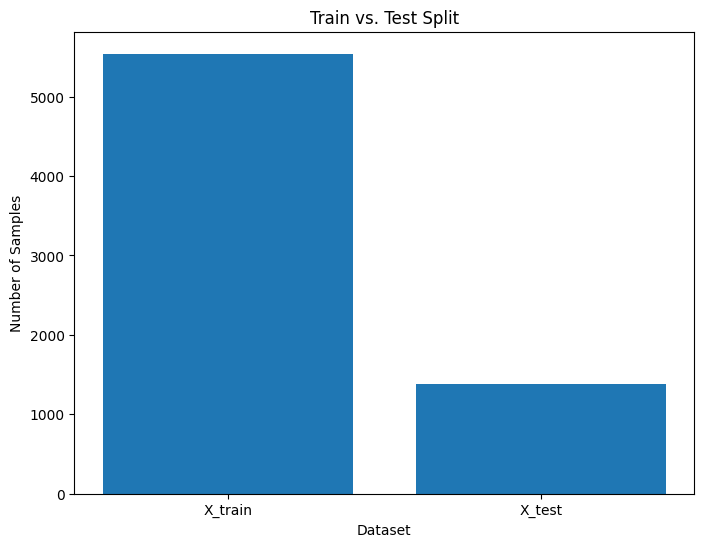

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# Plotting the shapes
plt.figure(figsize=(8, 6))
plt.bar(['X_train', 'X_test'], [X_train.shape[0], X_test.shape[0]])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Train vs. Test Split')
plt.show()


c:\Users\iheba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


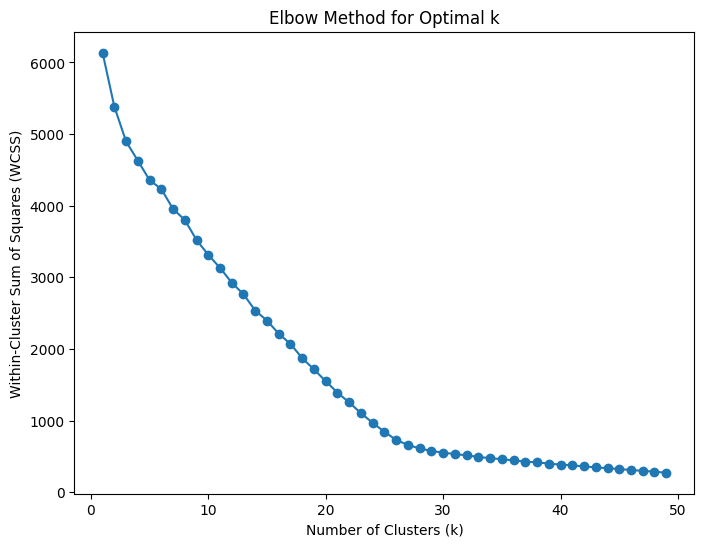

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data (replace this with your data)


# Calculate WCSS for different values of k
wcss = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(WordFeatures)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=30)
clf = clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.95
Accuracy of KNeighbors Classifier on test set: 0.94


In [31]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = clf

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])#into numerical features that the classifier
        predicted = self.clf.predict(feature)# trained machine learning 
        resume_position = self.le.inverse_transform(predicted)[0] #transformed back into the original job position 
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)# predict the probabilities of different job positions for the provided resume
        return predicted_prob[0]

In [32]:
job_description = """


Contact Information:
- Full Name: Emily Johnson
- Address: 456 Mechanic Street, City, State, ZIP
- Phone: (987) 654-3210
- Email: emily.johnson@email.com

Summary:
Experienced and skilled mechanic with 10+ years of hands-on expertise in diagnosing, repairing, and maintaining a wide range of vehicles. Proficient in identifying mechanical issues, providing accurate assessments, and delivering high-quality repairs. Strong problem-solving abilities, attention to detail, and commitment to ensuring vehicle safety and performance. Proven ability to work independently and collaboratively in fast-paced automotive environments.

Skills:
- Advanced knowledge of automotive systems and components
- Diagnostics using modern tools and equipment
- Engine repair and overhaul
- Brake system maintenance and repair
- Electrical system troubleshooting
- Strong proficiency in reading technical manuals and diagrams
- Welding and fabrication skills
- Excellent time management and organizational abilities

Experience:

Lead Automotive Technician
Speedy Auto Repair Shop - City, State
July 2015 - Present

- Perform comprehensive diagnostics to identify mechanical and electrical issues in various vehicle models.
- Carry out engine repairs, including rebuilding, cylinder head work, and timing belt replacements.
- Conduct thorough brake system inspections, diagnose problems, and perform repairs or replacements.
- Troubleshoot complex electrical issues using diagnostic tools, ensuring accurate solutions.
- Collaborate with team members to prioritize work orders and ensure efficient shop operations.
- Train and mentor junior mechanics, providing guidance on repairs and techniques.
- Maintain accurate service records, documenting repairs, parts used, and hours worked.

Mechanic Apprentice
AutoTech Garage - City, State
April 2012 - June 2015

- Assisted senior mechanics in diagnosing and repairing various automotive issues.
- Gained hands-on experience in performing routine maintenance tasks, such as oil changes, tire rotations, and fluid replacements.
- Learned to use diagnostic equipment and tools to identify vehicle problems accurately.
- Acquired skills in welding and fabrication for minor repairs and modifications.
- Developed strong attention to detail when inspecting vehicles for potential safety concerns.
- Assisted in maintaining a clean and organized workshop environment.

Education:

Associate Degree in Automotive Technology
City Technical Institute - City, State
Graduated: June 2012

Certifications:
- ASE Certified Automotive Technician (A1 - A8)
- EPA 609 Certification (Air Conditioning)

Skills:
- Welding and Fabrication
- Engine Diagnostics
- Brake System Repair
- Electrical Troubleshooting
- Team Collaboration
- Time Management
- Problem Solving
- Attention to Detail

References:
Available upon request.



"""

In [33]:
import plotly.express as px

job_predictor = JobPredictor()
resume_position = job_predictor.predict(job_description)

chart_data = pd.DataFrame({
    "position": [cl for cl in job_predictor.le.classes_],
    "match": job_predictor.predict_proba(job_description)
})
import plotly.io as pio


fig = px.bar(chart_data, x="position", y="match", title=f'Job Description matched to: {resume_position}')
pio.write_html(fig, "my_figure.html")

CREATE  DOCUMENT  

In [34]:
from sklearn.metrics.pairwise import cosine_similarity  #calculates the cosine similarity between vectors.
from sklearn.feature_extraction.text import CountVectorizer #converts text data into a matrix of token counts.
from docx import Document
from nltk.tokenize import WhitespaceTokenizer
import plotly.graph_objects as go
import plotly.express as px

import os

match=[]
text_tokenizer= WhitespaceTokenizer()
remove_characters= str.maketrans("", "", "±§!@#$%^&*()-_=+[]}{;'\:,./<>?|")#remove specific characters from tokens
cv = CountVectorizer()#convert text data into a term frequency matrix.
resume_docx = ""
file_path = "C:\\Users\\iheba\\Documents\\my_new_document.docx"
doc = Document(file_path)
indx=0
for para in doc.paragraphs:
  indx+=1
  if(len(para.text)>0):
    resume_docx += para.text
i=0
for job_des in data1['cleaned_description'].values :
    
    text_docx= [resume_docx, job_des]

    words_docx_list = text_tokenizer.tokenize(resume_docx)

    words_docx_list=[s.translate(remove_characters) for s in words_docx_list]

    count_docx = cv.fit_transform(text_docx) #Transforms the list of texts into a term frequency matrix.

    similarity_score_docx = cosine_similarity(count_docx) #calculates the cosine similarity between vectors.
    match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
    match.append(match_percentage_docx)
    i+=1
    print(f'Match percentage with the Job description: {match_percentage_docx}')

Match percentage with the Job description: 21.71
Match percentage with the Job description: 52.89
Match percentage with the Job description: 42.06
Match percentage with the Job description: 42.07
Match percentage with the Job description: 12.69
Match percentage with the Job description: 54.35
Match percentage with the Job description: 55.31
Match percentage with the Job description: 23.05
Match percentage with the Job description: 13.29
Match percentage with the Job description: 48.25
Match percentage with the Job description: 52.59
Match percentage with the Job description: 51.16
Match percentage with the Job description: 51.37
Match percentage with the Job description: 40.92
Match percentage with the Job description: 19.02
Match percentage with the Job description: 21.71
Match percentage with the Job description: 52.89
Match percentage with the Job description: 42.06
Match percentage with the Job description: 42.07
Match percentage with the Job description: 12.69
Match percentage wit

In [35]:
print(words_docx_list)
print(match_percentage_docx)

['Contact', 'Information', 'Full', 'Name', 'Emily', 'Johnson', 'Address', '456', 'Mechanic', 'Street', 'City', 'State', 'ZIP', 'Phone', '987', '6543210', 'Email', 'emilyjohnsonemailcomSummaryExperienced', 'and', 'skilled', 'mechanic', 'with', '10', 'years', 'of', 'handson', 'expertise', 'in', 'diagnosing', 'repairing', 'and', 'maintaining', 'a', 'wide', 'range', 'of', 'vehicles', 'Proficient', 'in', 'identifying', 'mechanical', 'issues', 'providing', 'accurate', 'assessments', 'and', 'delivering', 'highquality', 'repairs', 'Strong', 'problemsolving', 'abilities', 'attention', 'to', 'detail', 'and', 'commitment', 'to', 'ensuring', 'vehicle', 'safety', 'and', 'performance', 'Proven', 'ability', 'to', 'work', 'independently', 'and', 'collaboratively', 'in', 'fastpaced', 'automotive', 'environmentsSkills', 'Advanced', 'knowledge', 'of', 'automotive', 'systems', 'and', 'components', 'Diagnostics', 'using', 'modern', 'tools', 'and', 'equipment', 'Engine', 'repair', 'and', 'overhaul', 'Brake'

In [36]:
def search_max(values_list):
    index = []
    m = max(values_list)
    for i in range(len(values_list)):
        if values_list[i] > m-20:
            index.append(i)
    return index

max_indices= search_max(match)
# Unpack the list of indices
for i in max_indices:
    try :
      print(df3.loc[i])
    except KeyError : 
     pass 



               Job Title                        Company  \
5  Fuel Transport Driver  Marathon Petroleum Company LP   
5         BMW Technician                            BMW   

                                 Location  \
5  2100 E State Road 28  Muncie  IN 47303   
5                                       ·   

                                            Job Link  \
5  https://www.indeed.com/rc/clk?jk=49880fff5f31b...   
5  https://www.linkedin.com/jobs/view/bmw-technic...   

                                         description  
5   An exciting career awaits you At MPC  we’re c...  
5  About the job Berry Croydon is looking for a B...  
                            Job Title  Company  \
6  ROUTE DRIVER - VENDING (FULL-TIME)  Canteen   
6    electronic/mechanical technician     Cube   

                           Location  \
6  4501 Auth Pl  Suitland  MD 20746   
6                              Inc.   

                                            Job Link  \
6  https://www.indeed.com/r

In [37]:
import pandas as pd


rows = []

#Loop through the max_indices list and append each row of data.loc[i] to the list
for i in max_indices:
    try:
        rows.append(df2.loc[i],)
    except KeyError: 
        pass

#Concatenate the rows into a new DataFrame
print(rows)

#Print the new DataFrame


[Job Title                                         BMW Technician
Company                                                      BMW
Location                                                       ·
Job Link       https://www.linkedin.com/jobs/view/bmw-technic...
description    About the job Berry Croydon is looking for a B...
Name: 5, dtype: object, Job Title                       electronic/mechanical technician
Company                                                     Cube
Location                                                    Inc.
Job Link       https://www.linkedin.com/jobs/view/electronic-...
description    About the job Description It'd be helpful if t...
Name: 6, dtype: object, Job Title                        Mechanical Assembler Technician
Company                                              Scuttlebutt
Location                                                     LLC
Job Link       https://www.linkedin.com/jobs/view/mechanical-...
description    About the job This job is 

In [38]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = max(match),
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Match with Job Description"}))

fig.show()